In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# load data
data = pd.read_csv("fashion-mnist_train.csv")
# use only 4000 datapoints because altair cannot use more than 5000 in default configuration
data = data.loc[1:4000]
labels = data['label']


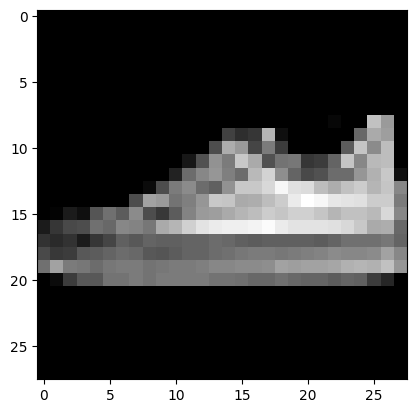

In [3]:
sneaker_row = data.query("label == 7").iloc[0]
sneaker_row = sneaker_row.to_frame().transpose()
sneaker_row_wl = sneaker_row.drop('label', axis=1)
img = sneaker_row_wl.to_numpy().reshape((28,28))
plt.imshow(img,cmap='gray')


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
4         0         0         0         0  

[1 rows x 785 columns]


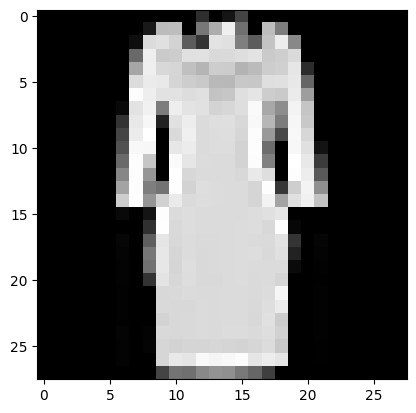

In [4]:
dress_row = data.query("label == 3").iloc[0]
dress_row = dress_row.to_frame().transpose()
print((dress_row))
dress_row_wl = dress_row.drop('label', axis=1)
img = dress_row_wl.to_numpy().reshape((28,28))
plt.imshow(img,cmap='gray')

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
5      4       0       0       0       5       4       5       5       3   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
5       5  ...         7         8         7         4         3         7   

   pixel781  pixel782  pixel783  pixel784  
5         5         0         0         0  

[1 rows x 785 columns]


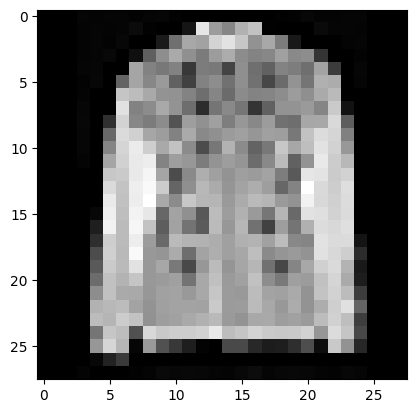

In [5]:
coat_row = data.query("label == 4").iloc[0]
coat_row = coat_row.to_frame().transpose()
print((coat_row))
coat_row_wl = coat_row.drop('label', axis=1)
img = coat_row_wl.to_numpy().reshape((28,28))
plt.imshow(img,cmap='gray')

In [6]:
data = data.drop('label', axis = 1)

In [7]:
from sklearn.preprocessing import StandardScaler
# standardize data using ready to use library
scaler = StandardScaler()
data_standard = scaler.fit_transform(data)
print(data)
print(data_standard)

      pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       5       0   
3          0       0       0       1       2       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       5       4       5       5       3       5   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
3996       0       0       0       0       0       0       0       0       0   
3997       0       0       0       0       0       0       0       0       0   
3998       0       0       0       0       0       0       0       1       1   
3999       0       0       0       0       0       0       0       0       0   
4000       0       0       0       0       0       0       0       0       0   

      pixel10  ...  pixel775  pixel776 

In [30]:
from sklearn.decomposition import PCA
import altair as alt
import time

pca = PCA(n_components=2)

start_time = time.time()
pca_result = pca.fit_transform(data_standard)
end_time = time.time()
print(f"Time taken: {end_time - start_time:.4f} seconds")

df_pca_result = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
# add labels for better visualization
df_pca_result['label'] = labels[:]
scatter_pca = alt.Chart(df_pca_result).mark_circle(size=30).encode(
    x='PC1',
    y='PC2',
    tooltip=['PC1', 'PC2', 'label'],
    color = 'label:N'
).properties(
    title='PCA Result',
    width=800,
    height=600
)

scatter_pca


Time taken: 0.4804 seconds


alt.Chart(...)

In [44]:
# tSNE with n_components=2, random_state = 42,perplexity=5, n_iter=1000
from sklearn.manifold import TSNE

tsne_5 = TSNE(n_components=2, random_state = 42,perplexity=5, n_iter=1000)
start_time = time.time()
tsne_result = tsne_5.fit_transform(data_standard)
end_time = time.time()
print(f"Time taken: {end_time - start_time:.4f} seconds")

df_tsne_result = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])
df_tsne_result['label'] = labels[:]

scatter_tsne = alt.Chart(df_tsne_result).mark_circle(size=30).encode(
    x='t-SNE1',
    y='t-SNE2',
    tooltip=['t-SNE1', 't-SNE2', 'label'],
    color = 'label:N'
).properties(
    title='tSNE Result',
    width=800,
    height=600
)

scatter_tsne

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Time taken: 54.4400 seconds


alt.Chart(...)

In [45]:
# tSNE with n_components=2, random_state = 42,perplexity=30, n_iter=1000
import time
from sklearn.manifold import TSNE

tsne_30 = TSNE(n_components=2, random_state = 42,perplexity=30, n_iter=1000)
start_time = time.time()
tsne_result = tsne_30.fit_transform(data_standard)
end_time = time.time()
print(f"Time taken: {end_time - start_time:.4f} seconds")

df_tsne_result = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])
df_tsne_result['label'] = labels[:]

scatter_tsne = alt.Chart(df_tsne_result).mark_circle(size=30).encode(
    x='t-SNE1',
    y='t-SNE2',
    tooltip=['t-SNE1', 't-SNE2', 'label'],
    color = 'label:N'
).properties(
    title='tSNE Result',
    width=800,
    height=600
)

scatter_tsne

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Time taken: 39.1216 seconds


alt.Chart(...)

In [46]:
# tSNE with n_components=2, random_state = 42,perplexity=50, n_iter=1000
from sklearn.manifold import TSNE

tsne_50 = TSNE(n_components=2, random_state = 42,perplexity=50, n_iter=1000)
start_time = time.time()
tsne_result = tsne_50.fit_transform(data_standard)
end_time = time.time()
print(f"Time taken: {end_time - start_time:.4f} seconds")

df_tsne_result = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])
df_tsne_result['label'] = labels[:]

scatter_tsne = alt.Chart(df_tsne_result).mark_circle(size=30).encode(
    x='t-SNE1',
    y='t-SNE2',
    tooltip=['t-SNE1', 't-SNE2', 'label'],
    color = 'label:N'
).properties(
    title='tSNE Result',
    width=800,
    height=600
)

scatter_tsne

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Time taken: 47.0009 seconds


alt.Chart(...)

In [47]:
# tSNE with n_components=2, random_state = 42,perplexity=100, n_iter=1000
from sklearn.manifold import TSNE

tsne_100 = TSNE(n_components=2, random_state = 42,perplexity=100, n_iter=1000)
start_time = time.time()
tsne_result = tsne_100.fit_transform(data_standard)
end_time = time.time()
print(f"Time taken: {end_time - start_time:.4f} seconds")

df_tsne_result = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])
df_tsne_result['label'] = labels[:]

scatter_tsne = alt.Chart(df_tsne_result).mark_circle(size=30).encode(
    x='t-SNE1',
    y='t-SNE2',
    tooltip=['t-SNE1', 't-SNE2', 'label'],
    color = 'label:N'
).properties(
    title='tSNE Result',
    width=800,
    height=600
)

scatter_tsne

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Time taken: 60.0015 seconds


alt.Chart(...)

In [ ]:
# install package
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.1 MB/s eta 0:00:00


In [60]:
# UMAP random_state=42, n_neighbors=15, min_dist=0.1
import umap
reducer_1501 = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.1)

start_time = time.time()
umap_result = reducer_1501.fit_transform(data_standard)
end_time = time.time()
print(f"Time taken: {end_time - start_time:.4f} seconds")

df_umap_result = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
df_umap_result['label'] = labels[:]

scatter_umap = alt.Chart(df_umap_result).mark_circle(size=30).encode(
    x='UMAP1',
    y='UMAP2',
    tooltip=['UMAP1', 'UMAP2', 'label'],
    color = 'label:N'
).properties(
    title='UMAP Result',
    width=800,
    height=600
)

scatter_umap

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Time taken: 46.2559 seconds


alt.Chart(...)

In [59]:
# UMAP random_state=42, n_neighbors=50, min_dist=0.1
import umap
reducer_5001 = umap.UMAP(random_state=42, n_neighbors=50, min_dist=0.1)

start_time = time.time()
umap_result = reducer_5001.fit_transform(data_standard)
end_time = time.time()
print(f"Time taken: {end_time - start_time:.4f} seconds")

df_umap_result = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
df_umap_result['label'] = labels[:]

scatter_umap = alt.Chart(df_umap_result).mark_circle(size=30).encode(
    x='UMAP1',
    y='UMAP2',
    tooltip=['UMAP1', 'UMAP2', 'label'],
    color = 'label:N'
).properties(
    title='UMAP Result',
    width=800,
    height=600
)

scatter_umap

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Time taken: 43.8923 seconds


alt.Chart(...)

In [58]:
# UMAP random_state=42, n_neighbors=50, min_dist=0.5
import umap
reducer_5005 = umap.UMAP(random_state=42, n_neighbors=50, min_dist=0.1)

start_time = time.time()
umap_result = reducer_5005.fit_transform(data_standard)
end_time = time.time()
print(f"Time taken: {end_time - start_time:.4f} seconds")

df_umap_result = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
df_umap_result['label'] = labels[:]

scatter_umap = alt.Chart(df_umap_result).mark_circle(size=30).encode(
    x='UMAP1',
    y='UMAP2',
    tooltip=['UMAP1', 'UMAP2', 'label'],
    color = 'label:N'
).properties(
    title='UMAP Result',
    width=800,
    height=600
)

scatter_umap

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Time taken: 37.5009 seconds


alt.Chart(...)

In [57]:
# UMAP random_state=42, n_neighbors=15, min_dist=0.5
import umap
reducer_1505 = umap.UMAP(random_state=42, n_neighbors=50, min_dist=0.1)

start_time = time.time()
umap_result = reducer_1505.fit_transform(data_standard)
end_time = time.time()
print(f"Time taken: {end_time - start_time:.4f} seconds")

df_umap_result = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
df_umap_result['label'] = labels[:]

scatter_umap = alt.Chart(df_umap_result).mark_circle(size=30).encode(
    x='UMAP1',
    y='UMAP2',
    tooltip=['UMAP1', 'UMAP2', 'label'],
    color = 'label:N'
).properties(
    title='UMAP Result',
    width=800,
    height=600
)

scatter_umap

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Time taken: 36.4277 seconds


alt.Chart(...)

All times we present are means of 5 tries and processed on google's coalb default CPU and python 3.

For PCA the time was about 0.3 seconds.

For perplexity=5, n_iter=1000 the time was about 32 seconds.

For perplexity=30, n_iter=1000 the time was about 50 seconds.

For perplexity=50, n_iter=1000 the time was about 55 seconds.

For perplexity=100, n_iter=1000 the time was about 72 seconds.

All the UMAP processing times were close to each other around 35 seconds.

The result for all 3 methods are not satisfactory. Dataset is "difficult", in terms of how different the labels are from each other. Maybe if the pictures were not coded only with 1 value of darkness/lightness, it could be more easy to differ between labels. Many pixel are always in the background meaning they do not present any variance. Different parameters provided somewhat different results, but still they were not close to grouping same pieces of clothing together. The PCA was the quickest one, while UMAP was expected to perform much faster than tSNE, it was not. One of the reasons could be the deprecated library.